<a href="https://colab.research.google.com/github/missLaiba22/Women-Who-Code-Challenge-2024/blob/main/Chest_X_ray_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Setting up the Environment and Installing fastbook**

In [1]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.9 MB/s eta 0:00:00
Mounted at /content/gdrive


In [2]:

from fastbook import *

**Fetching Chest X-ray Image URLs**

In [3]:
urls = search_images_ddg('chest x-ray images', max_images=1)
len(urls), urls[0]


(1,
 'https://www.healthline.com/hlcmsresource/images/imce/chest-x-ray_thumb.jpg')

In [4]:
# Download and show the chest x-ray image
dest = Path('chest_xray.jpg')
if not dest.exists(): download_url(urls[0], dest, show_progress=True)


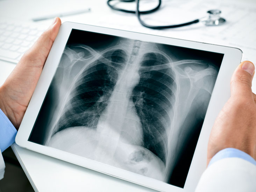

In [5]:
im = Image.open(dest)
im.to_thumb(256, 256)

**Image Search Function**

In [6]:
# Define image searches
searches = ['abnormal chest x-ray', 'normal chest x-ray']
path = Path('/content/chest_xray')
from time import sleep
# Download and resize images
for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images_ddg(f'person {o} photo'))
    resize_images(dest, max_size=400)

**Cleaning**

In [7]:
# Verify and clean up images
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

3

**Model Trainig**

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


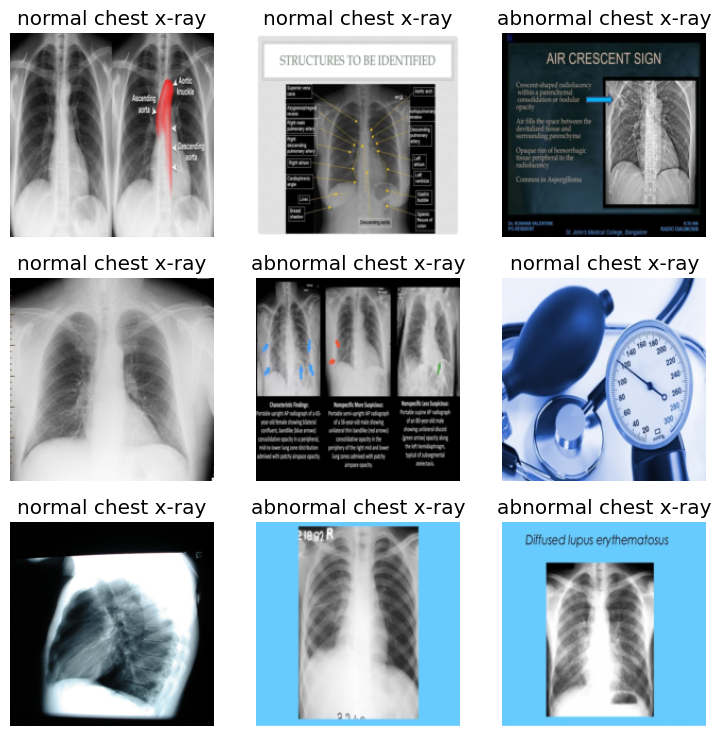

In [8]:
# Create a DataBlock and DataLoader
dls = ImageDataLoaders.from_folder(path,
                                   train='.',
                                   valid_pct=0.2,
                                   seed=42,
                                   item_tfms=[Resize(192, method='squish')])

# Show a batch of images
dls.show_batch(max_n=9)


In [9]:
# Create a CNN learner
learn = cnn_learner(dls, resnet34, metrics=error_rate)

# Fine-tune the model
learn.fine_tune(5)


/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 125MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.081221,1.062690,0.323529,01:24


epoch,train_loss,valid_loss,error_rate,time
0,0.721238,1.022862,0.338235,01:48
1,0.584604,1.289550,0.338235,01:47
2,0.491807,1.351501,0.338235,01:44
3,0.424667,1.418386,0.323529,01:44
4,0.374229,1.342934,0.323529,01:45


**Model Testing**

Test image


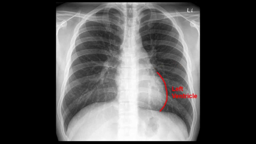

This is abnormal chest x-ray.
Probability this is abnormal chest x-ray: 0.265


In [21]:
# Make predictions
test_image='/content/chest_xray/abnormal chest x-ray/0553e1c7-0b48-4bdd-bead-8fd21f801f73.jpg'
is_abnormal, _, probs = learn.predict(PILImage.create(test_image))
print('Test image')
im = Image.open(test_image)
display(im.to_thumb(256,256))
print(f"This is {is_abnormal}.")
print(f"Probability this is abnormal chest x-ray: {probs[1]:.3f}")

Test image


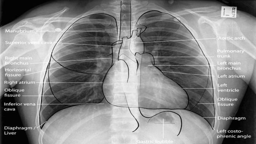

This is normal chest x-ray.
Probability this is normal chest x-ray: 0.947


In [23]:
# Make predictions
test_image='/content/chest_xray/normal chest x-ray/ee38ea7d-d1c0-4acf-8175-f66ce4631e9e.jpg'
is_normal, _, probs = learn.predict(PILImage.create(test_image))
print('Test image')
im = Image.open(test_image)
display(im.to_thumb(256,256))
print(f"This is {is_normal}.")
print(f"Probability this is normal chest x-ray: {probs[1]:.3f}")